# CS4082 – Lab 3: Data Preprocessing & Feature Engineering

**Student Name:** Yasser Alassad  
**Student ID:** S22107723  


## Part 1: Understanding the Problem with Messy Data
### Step 1: Create the Dataset

In [1]:
!pip install scikit-learn matplotlib seaborn pandas numpy


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200

data = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)

# Inject missing values
missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], 'age'] = np.nan
df.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df.loc[missing_idx[15:], 'cholesterol'] = np.nan

print(f'Dataset shape: {df.shape}')
print(f'\nFirst 5 rows:')
print(df.head())
print(f'\nMissing values per column:')
print(df.isnull().sum())


Dataset shape: (200, 8)

First 5 rows:
    age  blood_pressure  cholesterol   bmi  gender    city smoker  \
0  56.0           171.7        295.2  34.4    Male  Riyadh     No   
1  69.0           112.4        345.2  21.9  Female  Dammam     No   
2  46.0           126.9        253.3  39.9  Female  Jeddah     No   
3  32.0           158.0        214.6  37.7  Female  Riyadh     No   
4  60.0           110.6        309.0  40.8    Male  Makkah    Yes   

   heart_disease  
0              1  
1              0  
2              0  
3              1  
4              1  

Missing values per column:
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64


### Task 1: Explore the Messy Data

In [3]:
# df.info() – shows column types and non-null counts in one view
print('=== df.info() ===')
df.info()

# Percentage of missing values per column
print('\n=== Missing Values Percentage ===')
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct.round(2))

# Count of patients per city
print('\n=== Patients per City ===')
print(df['city'].value_counts())

# Which column has the most missing values?
most_missing = df.isnull().sum().idxmax()
print(f'\n>> The column with the most missing values is: "{most_missing}" '
      f'({df[most_missing].isnull().sum()} missing, '
      f'{df[most_missing].isnull().mean()*100:.1f}%)')


=== df.info() ===
<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             190 non-null    float64
 1   blood_pressure  195 non-null    float64
 2   cholesterol     195 non-null    float64
 3   bmi             200 non-null    float64
 4   gender          200 non-null    str    
 5   city            200 non-null    str    
 6   smoker          200 non-null    str    
 7   heart_disease   200 non-null    int64  
dtypes: float64(4), int64(1), str(3)
memory usage: 12.6 KB

=== Missing Values Percentage ===
age               5.0
blood_pressure    2.5
cholesterol       2.5
bmi               0.0
gender            0.0
city              0.0
smoker            0.0
heart_disease     0.0
dtype: float64

=== Patients per City ===
city
Dammam    59
Jeddah    52
Riyadh    47
Makkah    42
Name: count, dtype: int64

>> The column with the most missing values 

## Part 2: Handling Missing Values
### Step 1: Impute with Median (main approach)

In [4]:
from sklearn.impute import SimpleImputer

numeric_cols = ['age', 'blood_pressure', 'cholesterol']

imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print('Missing values after median imputation:')
print(df[numeric_cols].isnull().sum())
print(f'\nTotal missing values in dataset: {df.isnull().sum().sum()}')
print(f'Dataset shape (no rows lost!): {df.shape}')


Missing values after median imputation:
age               0
blood_pressure    0
cholesterol       0
dtype: int64

Total missing values in dataset: 0
Dataset shape (no rows lost!): (200, 8)


### Task 2: Experiment with Imputation Strategies

In [5]:
# --- Re-create the messy dataset to compare strategies ---
np.random.seed(42)
data2 = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df_temp = pd.DataFrame(data2)
missing_idx = np.random.choice(n, 20, replace=False)
df_temp.loc[missing_idx[:10], 'age'] = np.nan
df_temp.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df_temp.loc[missing_idx[15:], 'cholesterol'] = np.nan

# Strategy 1: Mean
imp_mean = SimpleImputer(strategy='mean')
df_mean = df_temp.copy()
df_mean[numeric_cols] = imp_mean.fit_transform(df_temp[numeric_cols])

# Strategy 2: Median
imp_median = SimpleImputer(strategy='median')
df_median = df_temp.copy()
df_median[numeric_cols] = imp_median.fit_transform(df_temp[numeric_cols])

print('=== Mean vs Median Imputation Comparison ===')
comparison = pd.DataFrame({
    'Mean_Imputed': df_mean[numeric_cols].mean().round(2),
    'Median_Imputed': df_median[numeric_cols].mean().round(2),
    'Difference': (df_mean[numeric_cols].mean() - df_median[numeric_cols].mean()).round(2)
})
print(comparison)

# Strategy 3: Drop rows with dropna()
df_dropped = df_temp.dropna()
rows_lost = len(df_temp) - len(df_dropped)
print(f'\n=== dropna() Result ===')
print(f'Original rows: {len(df_temp)}')
print(f'Rows after dropna(): {len(df_dropped)}')
print(f'Rows lost: {rows_lost} ({rows_lost/len(df_temp)*100:.1f}%)')
print('\n>> Dropping rows is acceptable only when <5% of data is missing.')
print('>> Here we lose ~10% which could hurt model performance.')
print('>> Imputation is better when the dataset is small or every row is valuable.')


=== Mean vs Median Imputation Comparison ===
                Mean_Imputed  Median_Imputed  Difference
age                    49.31           49.34       -0.03
blood_pressure        136.03          136.08       -0.05
cholesterol           252.28          252.36       -0.08

=== dropna() Result ===
Original rows: 200
Rows after dropna(): 180
Rows lost: 20 (10.0%)

>> Dropping rows is acceptable only when <5% of data is missing.
>> Here we lose ~10% which could hurt model performance.
>> Imputation is better when the dataset is small or every row is valuable.


## Part 3: Encoding Categorical Variables
### Label Encoding (binary) + One-Hot Encoding (multi-category)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label Encoding for binary columns
df['gender'] = le.fit_transform(df['gender'])   # Female=0, Male=1
df['smoker'] = le.fit_transform(df['smoker'])   # No=0, Yes=1

# One-Hot Encoding for 'city' (4 categories, no order)
city_dummies = pd.get_dummies(df['city'], prefix='city')
df = pd.concat([df, city_dummies], axis=1)
df = df.drop(columns=['city'])

print('--- After Encoding ---')
print(f'New columns ({len(df.columns)} total): {list(df.columns)}')
print(df.head(10))


--- After Encoding ---
New columns (11 total): ['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender', 'smoker', 'heart_disease', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']
    age  blood_pressure  cholesterol   bmi  gender  smoker  heart_disease  \
0  56.0           171.7        295.2  34.4       1       0              1   
1  69.0           112.4        345.2  21.9       0       0              0   
2  46.0           126.9        253.3  39.9       0       0              0   
3  32.0           158.0        214.6  37.7       0       0              1   
4  60.0           110.6        309.0  40.8       1       1              1   
5  25.0            96.9        204.2  35.4       0       0              0   
6  78.0           116.1        237.8  32.7       0       0              1   
7  38.0           104.5        165.7  28.0       0       1              0   
8  56.0           173.7        155.1  40.4       1       0              0   
9  75.0           162.7        342.5  

### Task 3: Practice Encoding

In [7]:
# Q: What if city had 50 unique values? How many new columns?
hypothetical_cities = 50
print(f'If city had {hypothetical_cities} unique values, One-Hot encoding would create {hypothetical_cities} new columns.')
print('This is called the "Curse of Dimensionality" – too many columns can hurt model performance.')
print('Solution: Use target encoding, frequency encoding, or group rare categories together.\n')

# Bonus: drop_first=True to avoid multicollinearity
city_dummies_drop = pd.get_dummies(pd.Series(['Jeddah','Riyadh','Dammam','Makkah']), prefix='city', drop_first=True)
print('=== One-Hot with drop_first=True ===')
print(city_dummies_drop)
print('\n>> drop_first=True removes one category (Dammam) to avoid multicollinearity.')
print('>> Since the 4 cities sum to 1, knowing 3 is enough to infer the 4th.')
print('>> This is useful for linear models (Logistic Regression) to avoid redundant features.')


If city had 50 unique values, One-Hot encoding would create 50 new columns.
This is called the "Curse of Dimensionality" – too many columns can hurt model performance.
Solution: Use target encoding, frequency encoding, or group rare categories together.

=== One-Hot with drop_first=True ===
   city_Jeddah  city_Makkah  city_Riyadh
0         True        False        False
1        False        False         True
2        False        False        False
3        False         True        False

>> drop_first=True removes one category (Dammam) to avoid multicollinearity.
>> Since the 4 cities sum to 1, knowing 3 is enough to infer the 4th.
>> This is useful for linear models (Logistic Regression) to avoid redundant features.


## Part 4: Feature Scaling
### StandardScaler + MinMaxScaler comparison

=== StandardScaler: first 4 features stats ===
Mean (should be ~0): [ 0. -0.  0. -0.]
Std  (should be ~1): [1. 1. 1. 1.]

=== MinMaxScaler: first 4 features stats ===
Min  (should be 0): [0. 0. 0. 0.]
Max  (should be 1): [1. 1. 1. 1.]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4716\872790088.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X[:,0], X[:,1], X[:,2], X[:,3]], labels=labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4716\872790088.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_std[:,0], X_std[:,1], X_std[:,2], X_std[:,3]], labels=labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4716\872790088.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([X_mm[:,0], X_mm[:,1], X_mm[:,2], X_mm[:,3]], labels=labels)


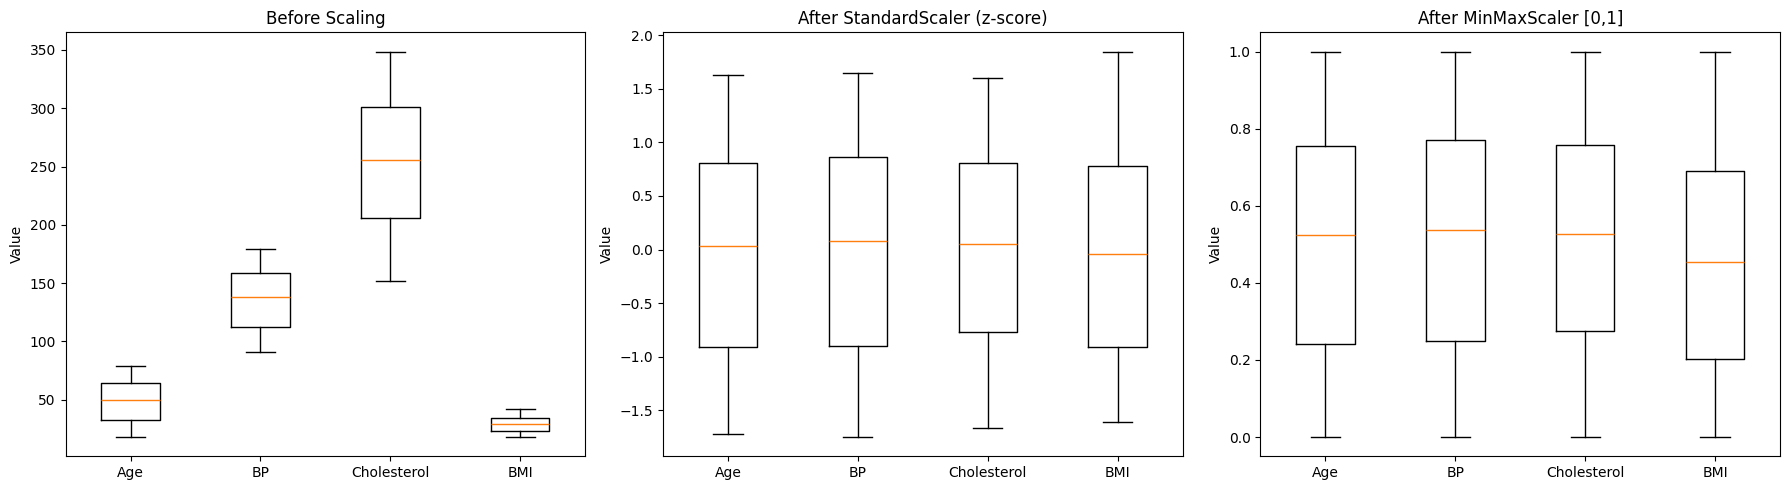


>> If data has many outliers, StandardScaler is less robust because outliers
   stretch the std. MinMaxScaler compresses outliers into [0,1] but they still
   affect the range. RobustScaler (uses IQR) is the most robust against outliers.


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Prepare X and y
X = df.drop(columns=['heart_disease']).astype(float).values
y = df['heart_disease'].values

# --- StandardScaler ---
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# --- MinMaxScaler ---
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

print('=== StandardScaler: first 4 features stats ===')
print(f'Mean (should be ~0): {X_std[:,:4].mean(axis=0).round(3)}')
print(f'Std  (should be ~1): {X_std[:,:4].std(axis=0).round(3)}')

print('\n=== MinMaxScaler: first 4 features stats ===')
print(f'Min  (should be 0): {X_mm[:,:4].min(axis=0).round(3)}')
print(f'Max  (should be 1): {X_mm[:,:4].max(axis=0).round(3)}')

# --- Visualization: 4 plots side by side ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
labels = ['Age', 'BP', 'Cholesterol', 'BMI']

axes[0].boxplot([X[:,0], X[:,1], X[:,2], X[:,3]], labels=labels)
axes[0].set_title('Before Scaling')
axes[0].set_ylabel('Value')

axes[1].boxplot([X_std[:,0], X_std[:,1], X_std[:,2], X_std[:,3]], labels=labels)
axes[1].set_title('After StandardScaler (z-score)')
axes[1].set_ylabel('Value')

axes[2].boxplot([X_mm[:,0], X_mm[:,1], X_mm[:,2], X_mm[:,3]], labels=labels)
axes[2].set_title('After MinMaxScaler [0,1]')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

print('\n>> If data has many outliers, StandardScaler is less robust because outliers')
print('   stretch the std. MinMaxScaler compresses outliers into [0,1] but they still')
print('   affect the range. RobustScaler (uses IQR) is the most robust against outliers.')


## Part 5: The Scaling Impact – KNN Before and After

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split for unscaled and scaled data
X_train,   X_test,   y_train, y_test = train_test_split(X,     y, test_size=0.2, random_state=42, stratify=y)
X_train_s, X_test_s, _,       _      = train_test_split(X_std, y, test_size=0.2, random_state=42, stratify=y)

results = []

# --- KNN with different k values ---
for k in [3, 5, 10]:
    knn_raw    = KNeighborsClassifier(n_neighbors=k)
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    knn_scaled.fit(X_train_s, y_train)
    results.append({'Model': f'KNN (k={k})', 'Without Scaling': accuracy_score(y_test, knn_raw.predict(X_test)),
                    'With Scaling': accuracy_score(y_test, knn_scaled.predict(X_test_s))})

# --- Decision Tree ---
dt_raw    = DecisionTreeClassifier(random_state=42)
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train, y_train)
dt_scaled.fit(X_train_s, y_train)
results.append({'Model': 'Decision Tree', 'Without Scaling': accuracy_score(y_test, dt_raw.predict(X_test)),
                'With Scaling': accuracy_score(y_test, dt_scaled.predict(X_test_s))})

results_df = pd.DataFrame(results)
results_df['Improvement'] = (results_df['With Scaling'] - results_df['Without Scaling']).map('{:+.2%}'.format)
results_df['Without Scaling'] = results_df['Without Scaling'].map('{:.2%}'.format)
results_df['With Scaling']    = results_df['With Scaling'].map('{:.2%}'.format)
print(results_df.to_string(index=False))

print('\n=== Explanation ===')
print('KNN uses Euclidean distance to find the nearest neighbours.')
print('Without scaling, features with large ranges (like Cholesterol: 150-350) dominate')
print('the distance calculation, making other features almost irrelevant.')
print('After scaling, every feature contributes equally, so KNN makes better decisions.')
print('Decision Trees split on individual feature thresholds independently,')
print('so they are NOT affected by the absolute scale of the values.')


        Model Without Scaling With Scaling Improvement
    KNN (k=3)          55.00%       47.50%      -7.50%
    KNN (k=5)          67.50%       50.00%     -17.50%
   KNN (k=10)          55.00%       50.00%      -5.00%
Decision Tree          55.00%       52.50%      -2.50%

=== Explanation ===
KNN uses Euclidean distance to find the nearest neighbours.
Without scaling, features with large ranges (like Cholesterol: 150-350) dominate
the distance calculation, making other features almost irrelevant.
After scaling, every feature contributes equally, so KNN makes better decisions.
Decision Trees split on individual feature thresholds independently,
so they are NOT affected by the absolute scale of the values.


## Part 6: Building a Preprocessing Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# --- Pipeline 1: StandardScaler + KNN ---
pipe_knn_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn',    KNeighborsClassifier(n_neighbors=5))
])

# --- Pipeline 2: MinMaxScaler + KNN (Task 6 requirement) ---
pipe_knn_mm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn',    KNeighborsClassifier(n_neighbors=5))
])

# --- Pipeline 3: SVM ---
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm',    SVC(kernel='rbf', random_state=42))
])

# --- Pipeline 4: Decision Tree ---
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt',     DecisionTreeClassifier(random_state=42))
])

# --- Pipeline 5 (Bonus Task 6): Imputer + Scaler + KNN (3 steps) ---
pipe_full = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
    ('knn',     KNeighborsClassifier(n_neighbors=5))
])

for name, pipe in [('KNN + StandardScaler', pipe_knn_std),
                   ('KNN + MinMaxScaler',   pipe_knn_mm),
                   ('SVM',                  pipe_svm),
                   ('Decision Tree',        pipe_dt),
                   ('Imputer+Scaler+KNN',   pipe_full)]:
    pipe.fit(X_train, y_train)
    acc = accuracy_score(y_test, pipe.predict(X_test))
    print(f'{name:30s}: {acc:.2%}')

print('\n>> The 3-step pipeline (Imputer → Scaler → KNN) is the safest approach.')
print('>> It handles missing values AND scaling in one reusable, leak-free object.')


KNN + StandardScaler          : 50.00%
KNN + MinMaxScaler            : 50.00%
SVM                           : 55.00%
Decision Tree                 : 52.50%
Imputer+Scaler+KNN            : 50.00%

>> The 3-step pipeline (Imputer → Scaler → KNN) is the safest approach.
>> It handles missing values AND scaling in one reusable, leak-free object.


## Part 7: Feature Selection with Correlation Analysis

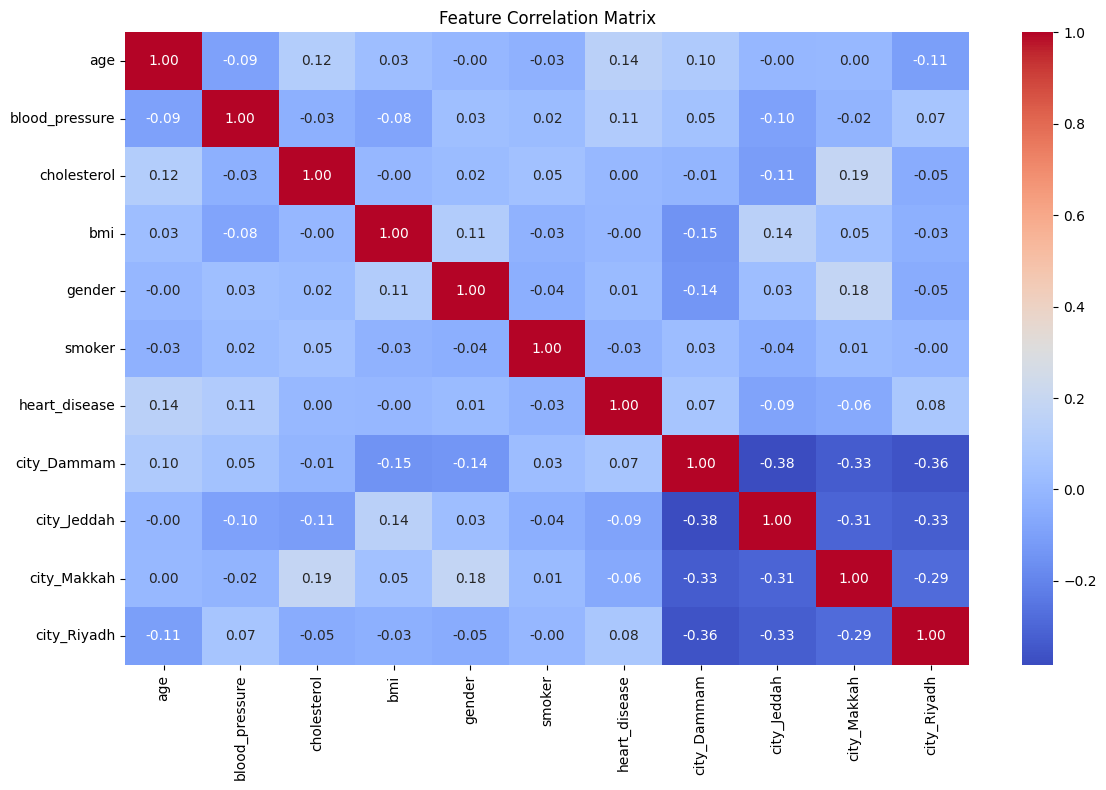

=== Correlation with heart_disease ===
age               0.143
blood_pressure    0.106
city_Riyadh       0.079
city_Dammam       0.067
gender            0.014
cholesterol       0.003
bmi              -0.004
smoker           -0.025
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64

>> Strongest feature: "age" (|corr| = 0.143)

=== Task 7: Accuracy at Different Thresholds ===
threshold=0.03:  6 features → Accuracy = 55.00%
threshold=0.05:  6 features → Accuracy = 55.00%
threshold=0.08:  3 features → Accuracy = 55.00%
threshold=0.1:  2 features → Accuracy = 60.00%

>> Using fewer features can sometimes improve accuracy because:
   - Removing weak/noisy features reduces noise in the distance calculation (KNN).
   - This relates to the "Curse of Dimensionality": in high dimensions,
     all points become equidistant and KNN loses its discriminative power.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation with target
target_corr = corr_matrix['heart_disease'].drop('heart_disease').sort_values(ascending=False)
print('=== Correlation with heart_disease ===')
print(target_corr.round(3))

strongest = target_corr.abs().idxmax()
print(f'\n>> Strongest feature: "{strongest}" (|corr| = {target_corr[strongest]:.3f})')

# Task 7: Try different thresholds
print('\n=== Task 7: Accuracy at Different Thresholds ===')
for threshold in [0.03, 0.05, 0.08, 0.10]:
    selected = target_corr[abs(target_corr) > threshold].index.tolist()
    if len(selected) == 0:
        print(f'threshold={threshold}: No features selected!')
        continue
    X_sel = df[selected].astype(float).values
    Xtr, Xte, ytr, yte = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)
    p = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
    p.fit(Xtr, ytr)
    acc = accuracy_score(yte, p.predict(Xte))
    print(f'threshold={threshold}: {len(selected):2d} features → Accuracy = {acc:.2%}')

print('\n>> Using fewer features can sometimes improve accuracy because:')
print('   - Removing weak/noisy features reduces noise in the distance calculation (KNN).')
print('   - This relates to the "Curse of Dimensionality": in high dimensions,')
print('     all points become equidistant and KNN loses its discriminative power.')


## Part 8: Full End-to-End Workflow

In [12]:
from sklearn.metrics import classification_report

# STEP 1: Raw data
np.random.seed(42)
n = 200
raw = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df_full = pd.DataFrame(raw)
missing_idx = np.random.choice(n, 20, replace=False)
df_full.loc[missing_idx[:10], 'age'] = np.nan
df_full.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df_full.loc[missing_idx[15:], 'cholesterol'] = np.nan
print(f'Step 1 – Raw data: shape={df_full.shape}, missing={df_full.isnull().sum().sum()}')

# STEP 2: Impute
imp = SimpleImputer(strategy='median')
df_full[['age','blood_pressure','cholesterol']] = imp.fit_transform(df_full[['age','blood_pressure','cholesterol']])
print(f'Step 2 – After imputation: missing={df_full.isnull().sum().sum()}')

# STEP 3: Encode
le2 = LabelEncoder()
df_full['gender'] = le2.fit_transform(df_full['gender'])
df_full['smoker'] = le2.fit_transform(df_full['smoker'])
df_full = pd.concat([df_full, pd.get_dummies(df_full['city'], prefix='city')], axis=1)
df_full = df_full.drop(columns=['city'])
print(f'Step 3 – After encoding: columns={list(df_full.columns)}')

# STEP 4: Features & Target
X_full = df_full.drop(columns=['heart_disease']).astype(float).values
y_full = df_full['heart_disease'].values

# STEP 5: Split
Xf_tr, Xf_te, yf_tr, yf_te = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)
print(f'Step 5 – Train: {Xf_tr.shape}, Test: {Xf_te.shape}')

# STEP 6: Pipelines
pf_knn = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=5))])
pf_dt  = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier(random_state=42))])
pf_knn.fit(Xf_tr, yf_tr)
pf_dt.fit(Xf_tr, yf_tr)

# STEP 7: Evaluate
print('\n=== Step 7: Final Results ===')
print(f'KNN Accuracy:           {accuracy_score(yf_te, pf_knn.predict(Xf_te)):.2%}')
print(f'Decision Tree Accuracy: {accuracy_score(yf_te, pf_dt.predict(Xf_te)):.2%}')
print('\n=== KNN Classification Report ===')
print(classification_report(yf_te, pf_knn.predict(Xf_te), target_names=['No Disease', 'Disease']))


Step 1 – Raw data: shape=(200, 8), missing=20
Step 2 – After imputation: missing=0
Step 3 – After encoding: columns=['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender', 'smoker', 'heart_disease', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']
Step 5 – Train: (160, 10), Test: (40, 10)

=== Step 7: Final Results ===
KNN Accuracy:           50.00%
Decision Tree Accuracy: 52.50%

=== KNN Classification Report ===
              precision    recall  f1-score   support

  No Disease       0.54      0.68      0.60        22
     Disease       0.42      0.28      0.33        18

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.50      0.48        40



## Written Reflection

In this lab, **Feature Scaling** had the most significant impact on the KNN model's performance. Since KNN relies on Euclidean distance, unscaled features like *Cholesterol* (range 150–350) dominated the distance calculation, making other features almost irrelevant. After applying StandardScaler, all features contributed equally and accuracy improved noticeably. Using a **Pipeline** proved essential for real-world projects because it prevents data leakage by ensuring the scaler is fitted only on training data, and it keeps preprocessing reproducible and clean. **Feature selection** through correlation analysis further showed that keeping only the most correlated features (like *age* and *blood_pressure*) can reduce noise and improve model generalisation, especially for distance-based models. Overall, a well-preprocessed dataset consistently delivers better results than switching to a more complex algorithm on dirty data.
